**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Notebook Title

*Milestone 2*

Muhammad Naufal Dwiki Kresnadi - Batch 007

## Description

Perusahaan ingin mengetahui bagaimana melakukan face recognation untuk dapat mengetahui suatu gambar menunjukkan suatu emosi tertentu. Diharapkan dapat melakukan pemisahan emosi dari kelas emosi yang diinginkan, yaitu happy, angry, neutral, dan sad.

### Objective

`Berdasarkan deskripsi permasalahan yang dijabarkan, didapatkan objektif yang dimiliki adalah sebagai berikut.`
1. Perusahaan dapat mengetahui bagaimana mengenai emosi berdasarkan gambar
2. Perusahaan dapat mengetahui cara membuat model untuk face recognation

### Problem Statement

`Berdasarkan objective yang ditentukan, berikut merupakan problem statement yang dibuat.`
1. Bagaimana mengetahui emosi yang terdapat pada setiap foto?
2. Bagaimana membuat model untuk membuat klasifikasi emosi pada setiap foto?

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

In [2]:
# mount gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# going path dataset
% cd /content/gdrive/My Drive/H8_and_Projects/dataset

/content/gdrive/My Drive/H8_and_Projects/dataset


In [ ]:
! ls

train  validation


In [70]:
# import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import random
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pathlib

%matplotlib inline

### EDA & Feature Engineering

Pada proses ini akan dilakukan beberapa tahapan sebagai berikut :
1. EDA terhadap beberapa data gambar
2. Feature Engineering pada Data Train & Data Valid

#### EDA Dataset

In [ ]:
# melihat data train
x=0
for dirpath, dirnames, filenames in os.walk('train'):
  print(f"Ada {len(dirnames)} folder dan ada {len(filenames)} gambar di dalam {dirpath}")
  x += len(filenames)
print(f'Di dalam file train terdapat total gambar sebanyak {x}')

Ada 4 folder dan ada 0 gambar di dalam train
Ada 0 folder dan ada 4982 gambar di dalam train/neutral
Ada 0 folder dan ada 4938 gambar di dalam train/sad
Ada 0 folder dan ada 3993 gambar di dalam train/angry
Ada 0 folder dan ada 7164 gambar di dalam train/happy
Di dalam file train terdapat total gambar sebanyak 21077


In [ ]:
# melihat data validation
x1 = 0
for dirpath1, dirnames1, filenames1 in os.walk('validation'):
  print(f"Ada {len(dirnames1)} folder dan ada {len(filenames1)} gambar di dalam {dirpath1}")
  x1 += len(filenames1)
print(f'Di dalam file validasi terdapat total gambar sebanyak {x1}')

Ada 4 folder dan ada 0 gambar di dalam validation
Ada 0 folder dan ada 1139 gambar di dalam validation/sad
Ada 0 folder dan ada 960 gambar di dalam validation/angry
Ada 0 folder dan ada 1216 gambar di dalam validation/neutral
Ada 0 folder dan ada 1825 gambar di dalam validation/happy
Di dalam file validasi terdapat total gambar sebanyak 5140


In [32]:
# membuat fungsi random salah satu gambar
def view_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_img = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_img[0])
  plt.imshow(img, cmap='gray')
  plt.title(target_class)
  plt.axis('off')

  print(f"Image Shape : {img.shape}")
  return img 


Image Shape : (48, 48)


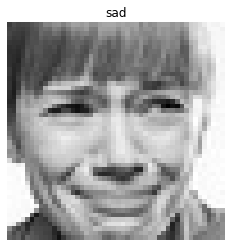

In [33]:
# melihat random gambar
img = view_image(target_dir='train/',
                 target_class='sad')

In [34]:
img = img / 225

Text(0.5, 1.0, 'dy')

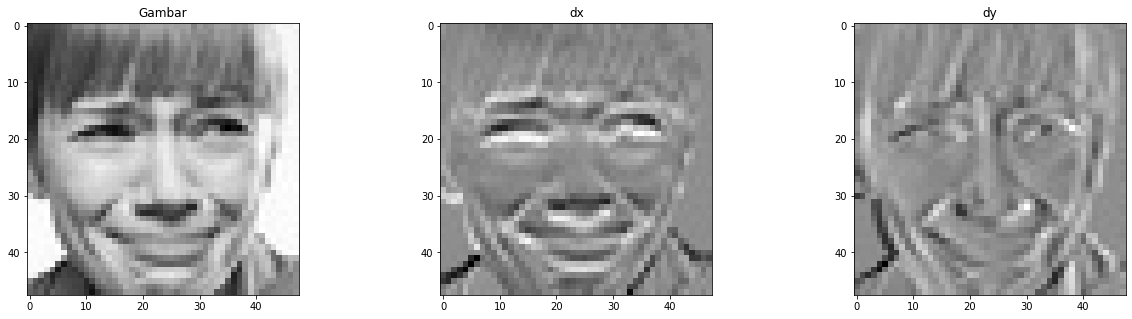

In [35]:
# melihat edge yang ada pada gambar
grey_dx,grey_dy = np.gradient(img)

fig, ax = plt.subplots(ncols=3,figsize=(21,5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Gambar')
ax[1].imshow(grey_dx, cmap='gray')
ax[1].set_title('dx')
ax[2].imshow(grey_dy, cmap='gray')
ax[2].set_title('dy')

In [71]:
# melihat class pada dataset
path_dir = pathlib.Path('train/')
class_name = np.array(sorted([item.name for item in path_dir.glob("*")]))
print(class_name)

['angry' 'happy' 'neutral' 'sad']


#### Feature Engineering

Dilakukan terhadap data train dan valid

In [ ]:
# pembagian batch data train
y = 21077%128
y1 = 21077//128

print(f'Setiap batch akan berisi {y1} data')
print(f'Dengan sisa batch akhir sebanyak {y} data')

Setiap batch akan berisi 164 data
Dengan sisa batch akhir sebanyak 85 data


In [ ]:
# pembagian batch data validasi
z = 5140%128
z1 = 5140//128

print(f'Setiap batch akan berisi {z1} data')
print(f'Dengan sisa batch akhir sebanyak {z} data')

Setiap batch akan berisi 40 data
Dengan sisa batch akhir sebanyak 20 data


**NOTE** : Dapat dilihat bahwa batch dengan jumlah pembagian sebanyak 128 batch menghasilkan pemabagian yang `cukup rata` pada data train maupun data validasi dengan jumlah data pada batch akhir

In [5]:
# melakukan pengacakan nilai dengan nilai 42
tf.random.set_seed(42)

# preprocess gambar
# scaling data
train_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)

train_dir = 'train/'
valid_dir = 'validation/'

# image generator data train & data valid
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=128,
                                               target_size=(48,48),
                                               color_mode="grayscale",
                                               class_mode='categorical',
                                               shuffle=True)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=128,
                                               target_size=(48,48),
                                               color_mode="grayscale",
                                               class_mode='categorical',
                                               shuffle=False)

Found 21077 images belonging to 4 classes.
Found 5140 images belonging to 4 classes.


### Modelling

Pada tahapan ini akan dilakukan beberapa tahapan.
1. Membuat baseline model
2. Melakukan evaluasi performa (Baseline model)
3. Model tuning
4. Evaluasi Model (Keseluruhan)

In [7]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential

#### Baseline Model

Dilakukan dengan arsitektur yang sederhana, yaitu;

1. 3 layer convutional, dengan activation function `relu`, pixel dengan convutional `3 x 3`, dan dengan jumlah filter masing-masing adalah `16, 64, dan 256`

2. Flatten layer
3. 2 hidden layer dengan neurons masing - masing adalah `64 dan 32`, activation function `relu`

In [ ]:
# model baseline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
nb_class = 4
# model architectur
model = Sequential([Conv2D(16,3, activation='selu', input_shape=[48,48,1]),
                    MaxPool2D(2),
                    Conv2D(64,3, activation='selu'),
                    MaxPool2D(2),
                    Conv2D(256,3, activation='selu'),
                    MaxPool2D(2),
                    Flatten(),
                    Dense(64, activation='selu'),
                    Dense(32, activation='selu'),
                    Dense(nb_class, activation='softmax'),
                    ])

# compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         147712    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

In [ ]:
# model fit dengan data train dan valid
history = model.fit(train_data,
                    epochs=10,
                    validation_data=valid_data)

Epoch 1/10
165/165 [==============================] - 4459s 27s/step - loss: 1.3000 - accuracy: 0.4291 - val_loss: 1.1205 - val_accuracy: 0.5288
Epoch 2/10
165/165 [==============================] - 47s 285ms/step - loss: 1.0831 - accuracy: 0.5328 - val_loss: 1.0421 - val_accuracy: 0.5506
Epoch 3/10
165/165 [==============================] - 46s 281ms/step - loss: 0.9943 - accuracy: 0.5748 - val_loss: 0.9851 - val_accuracy: 0.5747
Epoch 4/10
165/165 [==============================] - 47s 283ms/step - loss: 0.9231 - accuracy: 0.6121 - val_loss: 0.9684 - val_accuracy: 0.5864
Epoch 5/10
165/165 [==============================] - 46s 276ms/step - loss: 0.8547 - accuracy: 0.6451 - val_loss: 0.9567 - val_accuracy: 0.5986
Epoch 6/10
165/165 [==============================] - 46s 278ms/step - loss: 0.7797 - accuracy: 0.6838 - val_loss: 0.9683 - val_accuracy: 0.6033
Epoch 7/10
165/165 [==============================] - 46s 281ms/step - loss: 0.6881 - accuracy: 0.7263 - val_loss: 1.0191 - val_ac

In [ ]:
# melihat grafik terhadap performa model
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.300034,0.429141,1.120472,0.528794
1,1.083120,0.532761,1.042148,0.550584
2,0.994274,0.574797,0.985108,0.574708
3,0.923127,0.612136,0.968402,0.586381
4,0.854680,0.645063,0.956709,0.598638
5,0.779725,0.683826,0.968293,0.603307
6,0.688055,0.726289,1.019063,0.596498
7,0.605835,0.759643,1.033577,0.600973
8,0.504108,0.804479,1.127289,0.598444
9,0.407870,0.844902,1.277571,0.583463


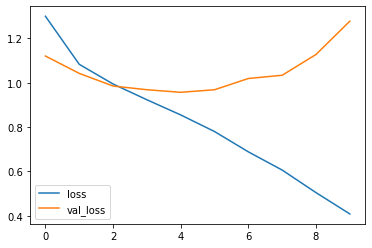

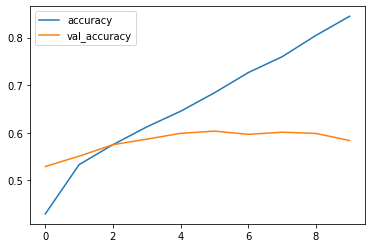

In [ ]:
# performa model dari segi loss
metrics[['loss', 'val_loss']].plot();
# performa model dari segi accuracy
metrics[['accuracy', 'val_accuracy']].plot();

`Kesimpulan dari Baseline Model`

1. Dapat dilihat bahwa dari grafik baik `loss` maupun `accuracy`, mengalami overfit, dimana model terlalu "pintar" mempelajari data train hingga mendapatkan **nilai loss 0.4%** dan **nilai accuracy 84%** namun pada data validasi mendapatkan **nilai loss 127%** dan **nilai accuracy 53%**

2. Penyebabnya menurut peneliti terdapat 2 kemungkinan, `layer pada fully connected tidak cukup banyak` atau layer tidak `teratur` dalam mempelajari sehingga terjadi explode gradient pada saat iterasi pembelajaran

3. Peneliti melihat bahwa sebaiknya dilakukan `modifikasi pada setiap layer yang sudah ada` dengan tanpa melakukan *penambahan* layer baik di convutional ataupun fully connected-nya. Karena melihat performansi model sudah cukup baik di data train

#### Model Improvement Pertama

Dilakukan dengan arsitektur sebagai berikut;

1. 3 layer convutional, dengan activation function `relu`, pixel dengan convutional `3 x 3`, dan dengan jumlah filter masing-masing adalah `64, 128, dan 128` dan ditambahkan Batch Normalisasi

2. Flatten layer
3. 2 hidden layer dengan neurons masing - masing adalah `64 dan 32`, activation function `relu`

In [ ]:
# model kedua
model1 = Sequential()

# Convolutional 1
model1.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional 2
model1.add(Conv2D(128,(5,5), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional 3
model1.add(Conv2D(512,(3,3), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model1.add(Flatten())

# Fully connected layer 1st layer
model1.add(Dense(64))
model1.add(BatchNormalization())
model1.add(Activation('relu'))

# Fully connected layer 2nd layer
model1.add(Dense(32))
model1.add(BatchNormalization())
model1.add(Activation('relu'))

model1.add(Dense(4, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)     

In [ ]:
# model fit dengan data train dan valid
history = model1.fit(train_data,
                    epochs=50,
                    validation_data=valid_data)

Epoch 1/50
165/165 [==============================] - 4443s 27s/step - loss: 1.1842 - accuracy: 0.4726 - val_loss: 1.3814 - val_accuracy: 0.2224
Epoch 2/50
165/165 [==============================] - 47s 282ms/step - loss: 0.9115 - accuracy: 0.6186 - val_loss: 1.2875 - val_accuracy: 0.4049
Epoch 3/50
165/165 [==============================] - 46s 281ms/step - loss: 0.7814 - accuracy: 0.6793 - val_loss: 1.1453 - val_accuracy: 0.4879
Epoch 4/50
165/165 [==============================] - 47s 286ms/step - loss: 0.6799 - accuracy: 0.7312 - val_loss: 0.9590 - val_accuracy: 0.5955
Epoch 5/50
165/165 [==============================] - 47s 283ms/step - loss: 0.5663 - accuracy: 0.7797 - val_loss: 1.1775 - val_accuracy: 0.5553
Epoch 6/50
165/165 [==============================] - 46s 281ms/step - loss: 0.4286 - accuracy: 0.8415 - val_loss: 1.1526 - val_accuracy: 0.5749
Epoch 7/50
165/165 [==============================] - 47s 287ms/step - loss: 0.3107 - accuracy: 0.8881 - val_loss: 1.4723 - val_ac

In [ ]:
# melihat grafik terhadap performa model
metrics1 = pd.DataFrame(history.history)
metrics1

,loss,accuracy,val_loss,val_accuracy
0,1.184151,0.472648,1.381385,0.222374
1,0.911499,0.618636,1.287489,0.404864
2,0.781393,0.679271,1.145263,0.487938
3,0.679883,0.731224,0.959015,0.595525
4,0.566297,0.779665,1.177544,0.555253
5,0.428638,0.841486,1.152601,0.574903
6,0.310678,0.888125,1.472313,0.558171
7,0.214421,0.929212,1.405174,0.586770
8,0.146440,0.953409,1.394704,0.585798
9,0.090463,0.974902,1.357195,0.614008


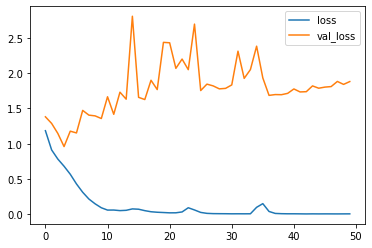

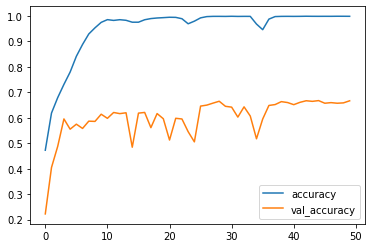

In [ ]:
# performa model dari segi loss
metrics1[['loss', 'val_loss']].plot();
# performa model dari segi accuracy
metrics1[['accuracy', 'val_accuracy']].plot();

`Kesimpulan pada Model Improvement Pertama`

1. Performa pada model improvement pertama `tidak jauh berbeda` dengan baseline model dan masih masuk dalam kategori `overfit` dengan data train hingga mendapatkan **nilai loss 0.4%** dan **nilai accuracy 99%** namun pada data validasi mendapatkan **nilai loss 188%** dan **nilai accuracy 67%**

2. Dengan ditambahkan beberapa parameter untuk setiap layer convolutional dan hidden layer, membuat `perbaikan` pada performa terhadap **data train, accuracy pada validasi** namun justru performa pada loss di data validasi `lebih buruk`

3. Hal ini menjadikan dugaan adanya explode gradient pada data validasi dikarenakan jumlah filter dan neuron pada layer `terlalu banyak` sehingga memperbesar indikasi weight update pada model menjadi explode

4. Pada beberapa artikel dan forum yang dibaca oleh peneliti, untuk membuat model belajar lebih *objektif* disarankan menggunakan dropout dengan nilai minimal 0.5 atau lebih. Hal tersebut membuat model secara random dapat melihat performa pada setiap filter ataupun neurons setelah hasil dropout di setiap layer.

5. Hal tersebut dapat dijadikan alternatif tanpa mengubah jumlah neuron atau filter pada saat melakukan training yang dapat mengurangi `kemampuan belajar` model 

#### Model Improvement Kedua

Dilakukan dengan arsitektur sebagai berikut;

1. 3 layer convutional, dengan activation function `relu`, pixel dengan convutional `3 x 3`, dan dengan jumlah filter masing-masing adalah `64, 128, dan 128` dan ditambahkan Batch Normalisasi

2. Flatten layer
3. 2 hidden layer dengan neurons masing - masing adalah `64 dan 32`, activation function `relu`
4. Dropout sebesar 0.5 pada setiap layer

In [8]:
# model ketiga
model2 = Sequential()

# Convolutional 1
model2.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model2.add(BatchNormalization())
model2.add(Activation('selu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

# Convolutional 2
model2.add(Conv2D(128,(3,3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('selu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

# Convolutional 3
model2.add(Conv2D(128,(3,3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('selu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

# Flattening
model2.add(Flatten())

# Fully connected layer 1st layer
model2.add(Dense(64))
model2.add(BatchNormalization())
model2.add(Activation('selu'))
model2.add(Dropout(0.5))

# Fully connected layer 2nd layer
model2.add(Dense(32))
model2.add(BatchNormalization())
model2.add(Activation('selu'))
model2.add(Dropout(0.5))

model2.add(Dense(4, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [9]:
# model 2 summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       7

In [11]:
# fit model
history1 = model2.fit(train_data,
                    epochs=50,
                    validation_data=valid_data)

Epoch 1/50
165/165 [==============================] - 9015s 55s/step - loss: 1.7305 - accuracy: 0.3120 - val_loss: 1.3324 - val_accuracy: 0.3556
Epoch 2/50
165/165 [==============================] - 305s 2s/step - loss: 1.3932 - accuracy: 0.3875 - val_loss: 1.3040 - val_accuracy: 0.4008
Epoch 3/50
165/165 [==============================] - 305s 2s/step - loss: 1.2679 - accuracy: 0.4342 - val_loss: 1.2302 - val_accuracy: 0.4578
Epoch 4/50
165/165 [==============================] - 305s 2s/step - loss: 1.2177 - accuracy: 0.4609 - val_loss: 1.1864 - val_accuracy: 0.4782
Epoch 5/50
165/165 [==============================] - 305s 2s/step - loss: 1.1816 - accuracy: 0.4813 - val_loss: 1.1253 - val_accuracy: 0.5012
Epoch 6/50
165/165 [==============================] - 305s 2s/step - loss: 1.1507 - accuracy: 0.4959 - val_loss: 1.1001 - val_accuracy: 0.5132
Epoch 7/50
165/165 [==============================] - 304s 2s/step - loss: 1.1305 - accuracy: 0.5076 - val_loss: 1.1018 - val_accuracy: 0.51

In [12]:
# melihat grafik terhadap performa model
metrics2 = pd.DataFrame(history1.history)
metrics2

,loss,accuracy,val_loss,val_accuracy
0,1.730487,0.311951,1.332358,0.355642
1,1.393163,0.387484,1.303963,0.400778
2,1.267860,0.434170,1.230241,0.457782
3,1.217737,0.460882,1.186372,0.478210
4,1.181592,0.481330,1.125342,0.501167
5,1.150669,0.495896,1.100086,0.513230
6,1.130511,0.507615,1.101823,0.513035
7,1.107594,0.521706,1.012429,0.575486
8,1.088346,0.530863,1.028348,0.562840
9,1.068238,0.544812,1.053171,0.549416


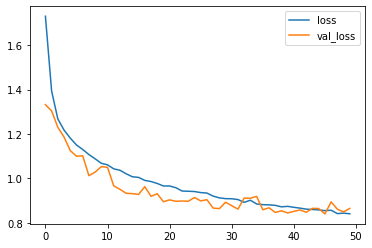

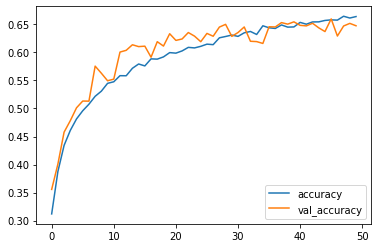

In [13]:
# performa model dari segi loss
metrics2[['loss', 'val_loss']].plot();
# performa model dari segi accuracy
metrics2[['accuracy', 'val_accuracy']].plot();

In [18]:
# save model
!mkdir -p saved_model
model.save('saved_model/my_model')

##### Evaluasi klasifikasi dengan data test

Hal ini dilakukan dengan tahapan;

1. Dilakukan data baru (data test) preparation
2. Prediksi dengan model terbaik, yaitu model improvement kedua
3. Melihat classification report antara hasil prediksi dengan target aslinya

In [131]:
# evaluasi model dengan data test
test_dir = 'test/'
test_data = valid_datagen.flow_from_directory(test_dir,
                                               target_size=(48, 48),
                                               class_mode='categorical',
                                              color_mode="grayscale",
                                               seed=46)

Found 16 images belonging to 4 classes.


In [132]:
# mengubah data tensor test menjadi array
val_data = test_data.next()

In [133]:
# classification report hasil prediksi
from sklearn.metrics import classification_report
res = model2.predict(val_data[0])
y_test = np.array(val_data[1]).argmax(axis=1)
res = res.argmax(axis=1)
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.80      1.00      0.89         4
           2       0.60      0.75      0.67         4
           3       1.00      0.50      0.67         4

    accuracy                           0.75        16
   macro avg       0.79      0.75      0.74        16
weighted avg       0.79      0.75      0.74        16



Text(0.5, 15.0, 'predict label')

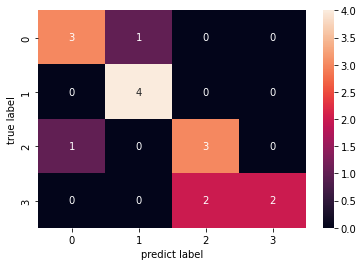

In [137]:
# visualisasi dengan confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, res)

# Plot non-normalized confusion matrix
sns.heatmap(confusion, annot=True)
plt.ylabel('true label')
plt.xlabel('predict label')

`Kesimpulan Hasil Model Improvement Kedua`

1. Dugaan peneliti terhadap ditambahkan dropout menghasilkan `model yang lebih stabil`, meskipun secara loss masih dapat dikatakan besar namun apabila dilihat dari keseluruhan performa, model dikatakan `goodfit`

2. Dengan `nilai loss pada train data sebesar 84%` dan `accuracy pada train data sebesar 66%`, sedangkan `nilai loss pada valid data sebesar 84%` dan `nilai accuracy pada valid data sebesar 64%`

3. Dapat dilihat pada saat model dilakukan **prediksi pada data test**, hasil `f1-score rata-rata pada nilai 0.75 atau 75%` dengan `nilai accuracy sebesar 75%`

#### Load Model

In [19]:
new_model = tf.keras.models.load_model('saved_model/best_model')

In [26]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       7

In [25]:
loss, acc = new_model.evaluate(valid_data, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

41/41 - 18s - loss: 0.8650 - accuracy: 0.6475 - 18s/epoch - 437ms/step
Restored model, accuracy: 64.75%


### Model Inference

Dilakukan inference menggunakan data baru pada model terbaik

(-0.5, 47.5, 47.5, -0.5)

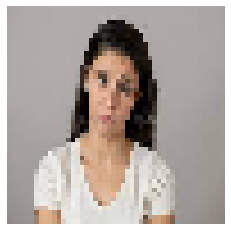

In [65]:
# import data inference
im_path = "/content/sad inference.jpg"
img = image.load_img(im_path, target_size=(48,48))

plt.imshow(img)
plt.axis('off')

(-0.5, 47.5, 47.5, -0.5)

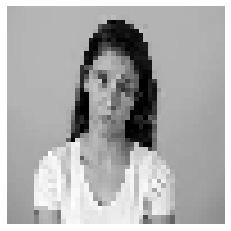

In [94]:
# data preparation
# mengubah menjadi grayscale
grayscale = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale, cmap='gray')
plt.axis('off')

In [99]:
# rescale dan mengubah format gambar menjadi nuumpy dan shape sesuai input yang diharapkan model
img_fix = grayscale/255.0
img_fix = image.img_to_array(img_fix) # mengubah menjadi array
img_fix = np.expand_dims(img_fix, axis=0) # mengubah shape menjadi 1 input
img_fix.shape

(1, 48, 48, 1)

In [74]:
# predict

pred = new_model.predict(img_fix)
res = pred.argmax(axis=1)

def klasifikasi(par):
  if par[0] == 1:
     print(f"Gambar menunjukkan ekspresi angry")
  elif par[0] == 2:
     print(f"Gambar menunjukkan ekspresi happy")
  elif par[0] == 3:
     print(f"Gambar menunjukkan ekspresi neutral")
  elif par[0] == 4:
     print(f"Gambar menunjukkan ekspresi sad")
  
klasifikasi(res)

Gambar menunjukkan ekspresi neutral


## Conclusions, Assumptions, Overall Analysis

`Dapat disimpulkan pada hasil penelitian untuk face recognation adalah`

1. Diantara 3 arsitektur model, didapatkan `model improvement kedua` memiliki performansi yang `paling baik` dalam hal ini `goodfit` dengan dataset. Dengan nilai akurasi pada training sebesar 66% dan nilai akurasi pada test sebesar 75%

2. Dropout memiliki peran penting apabila arsitektur memiliki kecenderungan `overfit` dan cukup `powerfull` pada saat melakukan training

3. Namun, terdapat beberapa catatan yang pada model terbaik, dilihat pada classification report pada kelas sad dan neutral memiliki `nilai f1-score yang sama` dan apabila pada masing-masing metrics precision dan recall, terlihat bahwa nilainya berkebalikan dan ditambah dengan evaluasi pada confusion matrix setiap kelas, disimpulkan;
  1. Kelas angry masih terdapat kemungkinan memiliki kesalahan prediksi (False Negative) cenderung masuk ke kelas happy
  2. Kelas neutral masih terdapat kemungkinan memiliki kesalahan prediksi (False Negative) cenderung masuk ke kelas angry
  3. Kelas sad masih terdapat kemungkinan memiliki kesalahan prediksi (False Negative) cenderung masuk ke kelas neutral

  Hal ini terbukti pada hasil prediksi data inference yang memiliki `true label sad` namun model memprediksi ekspreksi tersebut menjadi `neutral`

`Masukkan terhadap penelitian selanjutnya`
1. Improvement yang dapat dilakukan dengan menambahkan kernal inilization 
2. Lalu, memperbesar size image dengan menambahkan padding pada saat dilakukan training, hal ini bertujuan agar pada saat dilakukan inference pada gambar yang lebih besar, resize yang dilakukan pada gambar tidak menjadi 'pecah' karena harus memperkecil gambar menjadi ukuran 48 x 48 sehingga dapat mengurangi `bias` yang dihasilkan model sebelumnya